In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read dataset

In [2]:
df = pd.read_csv('insurance.csv')

In [54]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [55]:
df.shape

(1338, 7)

In [56]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [57]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [58]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


## Summary of Categorial data

In [59]:


insurance_stat = pd.DataFrame(columns=['columns', 'values', 'inc_na', 'exc_na', 'missval', 'pctmissval'])
categorical = ['sex', 'smoker', 'region']
temp = pd.DataFrame()

for i in categorical:
    temp['columns'] = [i]
    temp['values'] = [df[i].unique()]
    temp['inc_na'] = len(df[i].unique())
    temp['exc_na'] = df[i].nunique()
    temp['missval'] = df[i].isnull().sum()
    temp['pctmissval'] = (df[i].isnull().sum()/len(df))*100
    insurance_stat = insurance_stat.append(temp)

insurance_stat

,columns,values,inc_na,exc_na,missval,pctmissval
0,sex,"[female, male]",2,2,0,0.0
0,smoker,"[yes, no]",2,2,0,0.0
0,region,"[southwest, southeast, northwest, northeast]",4,4,0,0.0


## Summary numerical data

In [60]:
Numerical_insurance = pd.DataFrame(columns=['columns','Min','Max','MissingVals','%_MissingVals','IQR','lower','upper'])
temp = pd.DataFrame()
numerical = ['age', 'bmi', 'children', 'expenses']
for i in numerical:
    temp['columns'] = [i]
    temp['Min'] = df[i].min()
    temp['Max'] = df[i].max()
    temp['MissingVals'] = df[i].isnull().sum()
    temp['%_MissingVals'] = df[i].isnull().sum()/len(df)*100
    temp['IQR'] = df[i].quantile(.75) - df[i].quantile(.25)
    temp['lower'] = df[i].quantile(.25) - 1.5*temp['IQR']
    temp['upper'] = df[i].quantile(.75) + 1.5*temp['IQR']
    Numerical_insurance = Numerical_insurance.append(temp)
    
Numerical_insurance

,columns,Min,Max,MissingVals,%_MissingVals,IQR,lower,upper
0,age,18,64,0,0.0,24.0000,-9.00000,87.00000
0,bmi,16.0,53.1,0,0.0,8.4000,13.70000,47.30000
0,children,0,5,0,0.0,2.0000,-3.00000,5.00000
0,expenses,1121.87,63770.43,0,0.0,11899.6275,-13109.15375,34489.35625


## Univariate analysis

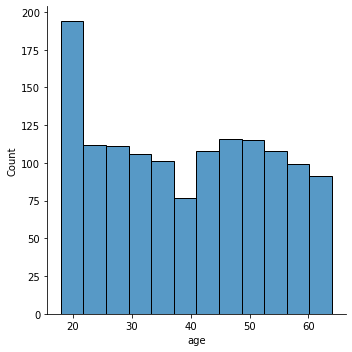

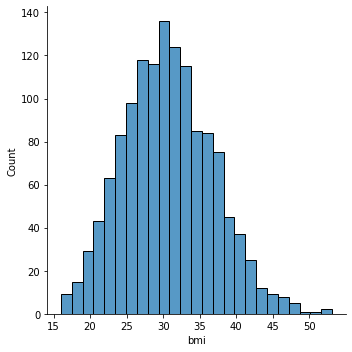

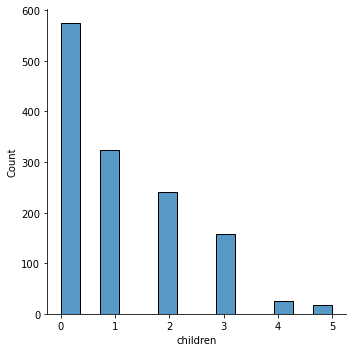

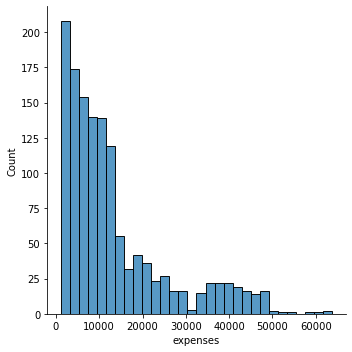

In [61]:
for i in numerical:
    sns.displot(df[i])

## Outlier detection

<AxesSubplot:xlabel='age'>

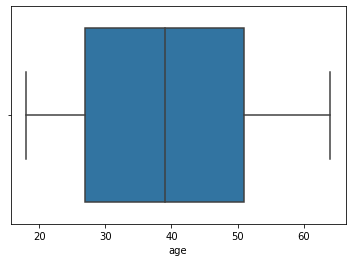

In [62]:
sns.boxplot(x = df['age'])

<AxesSubplot:xlabel='bmi'>

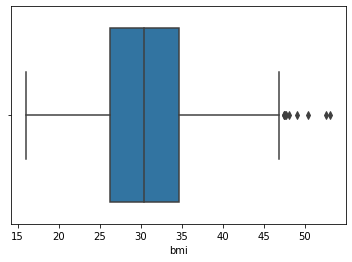

In [63]:
sns.boxplot(x = df['bmi'])

## Bivariaate analysis

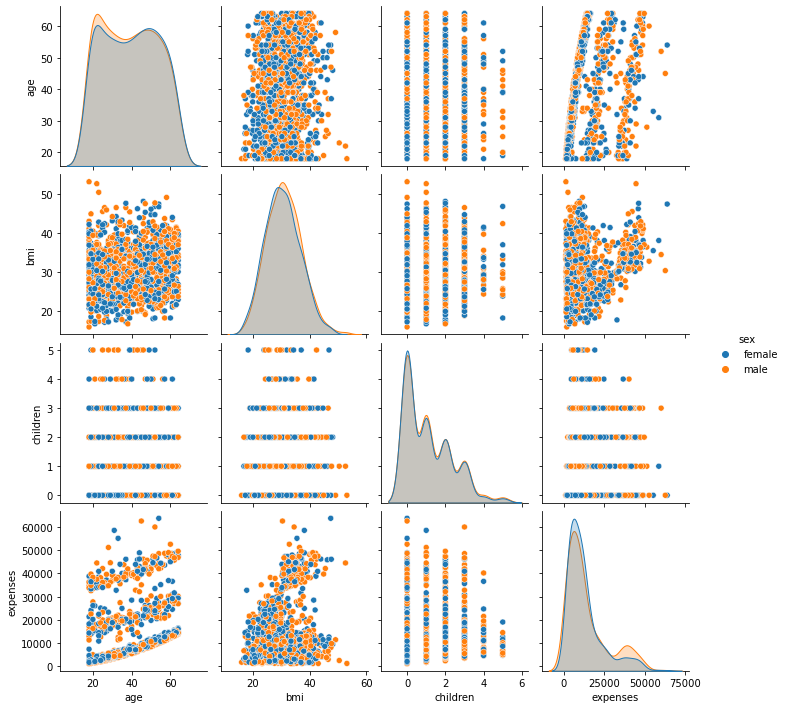

In [64]:
sns.pairplot(df, hue='sex')

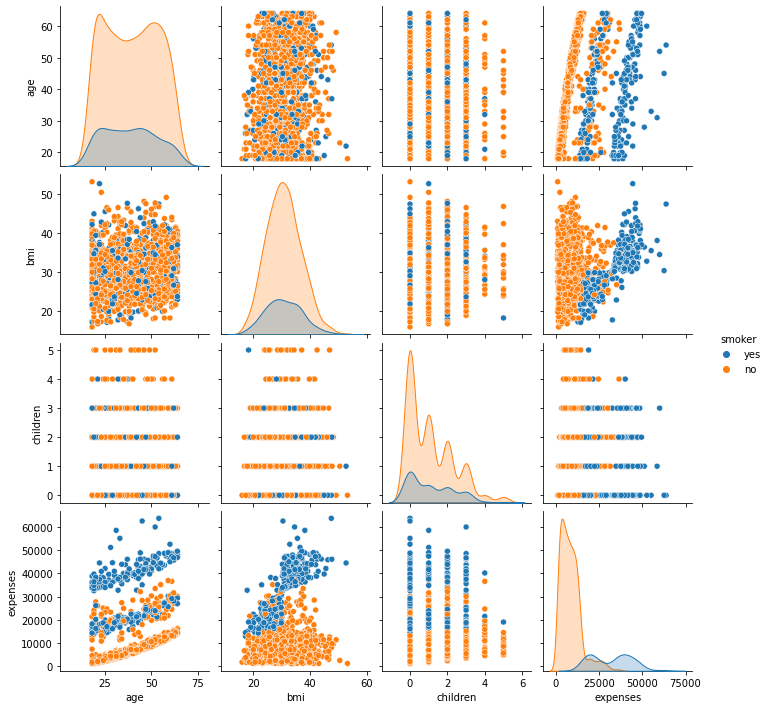

In [65]:
sns.pairplot(df, hue='smoker')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

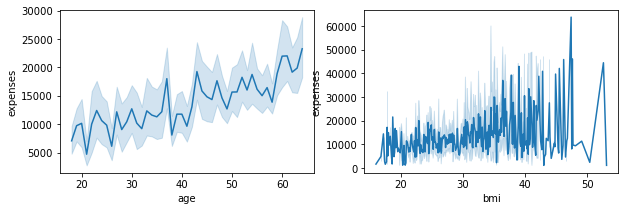

In [66]:
fig = plt.figure(figsize=(10,3))
fig.add_subplot(121)
sns.lineplot(x='age', y='expenses', data = df)
fig.add_subplot(122)
sns.lineplot(x='bmi', y='expenses', data = df)

<AxesSubplot:xlabel='age', ylabel='expenses'>

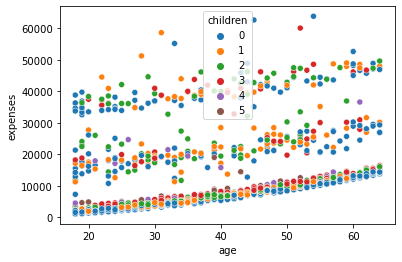

In [67]:

sns.scatterplot(x='age', y='expenses',hue='children', data=df, palette='tab10')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

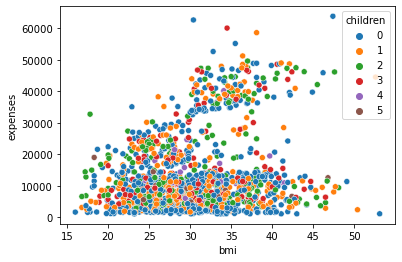

In [68]:
sns.scatterplot(x='bmi', y='expenses',hue='children', data=df, palette='tab10')

In [69]:
df.groupby("region").expenses.agg(["mean","median","count"])

,mean,median,count
region,,,
northeast,13406.384691,10057.655,324
northwest,12417.575169,8965.800,325
southeast,14735.411538,9294.130,364
southwest,12346.937908,8798.590,325


## info

Expenses increases with age

Expenses also increases with bmi

Smokers have high expenses

In [3]:
df1 = df.copy()

In [4]:
df1['smoker'] = df1['smoker'].map({"no":0, "yes":1})
df1['sex'] = df1['sex'].map({"female":0, "male":1})

In [5]:
df1

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55
1334,18,0,31.9,0,0,northeast,2205.98
1335,18,0,36.9,0,0,southeast,1629.83
1336,21,0,25.8,0,0,southwest,2007.95


In [6]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(df[['region']]))
df1.drop(columns=['region'], inplace=True)
df1 = pd.concat([df1, encoded_data], axis=1, join='inner')

In [58]:
df1

,age,sex,bmi,children,smoker,expenses,0,1,2
0,19,0,27.9,0,1,16884.92,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,1.0,0.0,0.0
1334,18,0,31.9,0,0,2205.98,0.0,0.0,0.0
1335,18,0,36.9,0,0,1629.83,0.0,1.0,0.0
1336,21,0,25.8,0,0,2007.95,0.0,0.0,1.0


In [73]:
df1 = pd.get_dummies(df1, columns=['region'], drop_first=True)
df1

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,1,0,0
1334,18,0,31.9,0,0,2205.98,0,0,0
1335,18,0,36.9,0,0,1629.83,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,1


<AxesSubplot:>

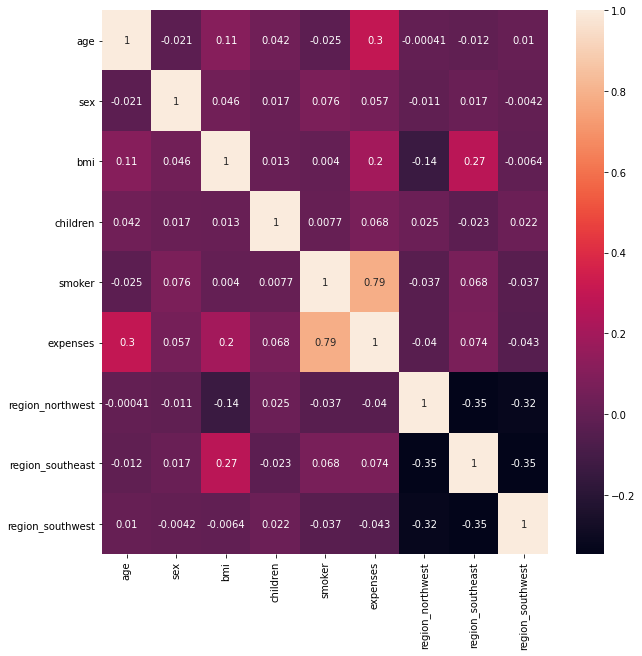

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)

In [56]:
df1_scaled = df1.copy()

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1_scaled[['age']] = ss.fit_transform(df1[['age']])

In [10]:
df1_scaled.head()

,age,sex,bmi,children,smoker,expenses,0,1,2
0,-1.438764,0,27.9,0,1,16884.92,0.0,0.0,1.0
1,-1.509965,1,33.8,1,0,1725.55,0.0,1.0,0.0
2,-0.797954,1,33.0,3,0,4449.46,0.0,1.0,0.0
3,-0.441948,1,22.7,0,0,21984.47,1.0,0.0,0.0
4,-0.513149,1,28.9,0,0,3866.86,1.0,0.0,0.0


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df1.drop('expenses', axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


    feature        VIF
0       age   7.687687
1       sex   2.003185
2       bmi  11.359233
3  children   1.809887
4    smoker   1.261267
5         0   1.890263
6         1   2.265601
7         2   1.960613


In [85]:
X = df1.drop(['expenses','sex'], axis=1)
y = df1[['expenses']]

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

    feature        VIF
0       age   7.682121
1       bmi  10.687462
2  children   1.807968
3    smoker   1.251314
4         0   1.888691
5         1   2.265590
6         2   1.959855


In [80]:
print(X.shape,y.shape)

(1338, 7) (1338, 1)


In [81]:
import statsmodels.api as sm

results = sm.OLS(y,X).fit()

In [82]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               expenses   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1320.
Date:                Sat, 04 Sep 2021   Prob (F-statistic):                        0.00
Time:                        05:19:11   Log-Likelihood:                         -13619.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1331   BIC:                                  2.729e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                202.3849     11.627     17.406      0.000     179.576     225.194
bmi                 60.5533     18.268      3.315      0.001      24.717      96.390
children           280.0534    144.278      1.941      0.052      -2.984     563.091
smoker             2.33e+04    431.861     53.954      0.000    2.25e+04    2.41e+04
region_northwest -1763.2231    487.164     -3.619      0.000   -2718.915    -807.531
region_southeast -1284.4215    504.169     -2.548      0.011   -2273.474    -295.369
region_southwest -1968.9036    496.257     -3.968      0.000   -2942.434    -995.373
==============================================================================
Omnibus:                      277.118   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.433
Skew:                           1.128   Prob(JB):                    5.76e-142
Kurtosis:                       5.564   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### sex is not statistically significant so removing it

In [87]:
import statsmodels.api as sm
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               expenses   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1320.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:36:44   Log-Likelihood:                         -13619.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1331   BIC:                                  2.729e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          202.3849     11.627     17.406      0.000     179.576     225.194
bmi           60.5533     18.268      3.315      0.001      24.717      96.390
children     280.0534    144.278      1.941      0.052      -2.984     563.091
smoker       2.33e+04    431.861     53.954      0.000    2.25e+04    2.41e+04
0          -1763.2231    487.164     -3.619      0.000   -2718.915    -807.531
1          -1284.4215    504.169     -2.548      0.011   -2273.474    -295.369
2          -1968.9036    496.257     -3.968      0.000   -2942.434    -995.373
==============================================================================
Omnibus:                      277.118   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.433
Skew:                           1.128   Prob(JB):                    5.76e-142
Kurtosis:                       5.564   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
print(X_train.shape, Y_train.shape)

(1003, 6) (1003, 1)


In [105]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [104]:
lr.score(X_test, Y_test)

0.7673785066466381

In [117]:
alph = np.linspace(-2,5)
reg = LassoCV(cv=5, random_state=0).fit(X_train, Y_train)

C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [118]:
reg.alpha_

70.62151182895933

In [119]:
lasso = Lasso(alpha=70.62151182895933)
lasso.fit(X_train, Y_train)

Lasso(alpha=70.62151182895933)

In [120]:
lasso.score(X_test, Y_test)

0.7645621314097442

In [20]:
from sklearn.model_selection import cross_val_score

In [136]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
cv = cross_val_score(regressor, X_train, Y_train, cv=10)

In [137]:
print(cv)
print(cv.mean())

[0.71640499 0.71561366 0.78499408 0.66613562 0.52848006 0.66491102
 0.47997689 0.71373779 0.67411934 0.75396673]
0.6698340190193364


In [138]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [139]:
regressor.score(X_test, Y_test)

0.7672846068930504

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
cv = cross_val_score(rf, X_train, Y_train, cv=10)

<ipython-input-89-5d49f22fcd43>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [90]:
print(cv)
print(cv.mean())

[0.84781052 0.83329504 0.91394304 0.83900839 0.74286536 0.84233252
 0.69808718 0.77603239 0.814538   0.84560541]
0.8153517849730442


In [91]:
rf.score(X_test, Y_test)

0.8532881990832044

In [ ]:
{'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

In [153]:
from sklearn.model_selection import RandomizedSearchCV
distributions  = {
'criterion': ['mse', 'mae'],
 'max_depth': [18,10, 25, 30],
 'max_features': ['auto'],
 'min_samples_leaf': [1,2,3,4],
 'min_samples_split': [2,4],
 'n_estimators': [90, 110, 120, 150]
}

In [156]:
clf = RandomizedSearchCV(RandomForestRegressor(), distributions, random_state=0, n_iter=100, n_jobs=-1)
search = clf.fit(X_train, Y_train)
search.best_params_

C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 18,
 'criterion': 'mae'}

In [157]:
search.best_score_

0.8502952979075467

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=110,min_samples_split=2,min_samples_leaf=3, max_features='auto', max_depth=18,criterion='mae')
rf.fit(X_train, Y_train)

<ipython-input-92-4b5b3374a4d8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestRegressor(criterion='mae', max_depth=18, min_samples_leaf=3,
                      n_estimators=110)

In [93]:
rf.score(X_test, Y_test)

0.8622947354463941

In [94]:
def adj_r2(x,y):
    r2 = rf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [95]:
adj_r2(X_train, Y_train)

0.9006027379726598

In [96]:
adj_r2(X_test, Y_test)

0.8593469163275096

In [45]:
X_train[['age','bmi']] = ss.fit_transform(X_train[['age','bmi']])
X_test[['age','bmi']] = ss.transform(X_test[['age','bmi']])

<ipython-input-45-24ca2e7e099b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['age','bmi']] = ss.fit_transform(X_train[['age','bmi']])
C:\Users\bijoy\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-45-24ca2e7e099b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [46]:
X_train

,age,bmi,children,smoker,region_northwest,region_southeast,region_southwest
693,-1.087167,-1.133669,0,0,1,0,0
1297,-0.802106,-0.667800,2,0,0,1,0
634,0.836992,1.528440,1,0,0,0,1
1022,0.551932,0.929466,1,1,0,1,0
178,0.480667,-0.268484,2,0,0,0,1
...,...,...,...,...,...,...,...
1095,-1.514757,0.147471,4,0,0,0,0
1130,-0.018189,-1.100393,5,0,0,1,0
1294,1.335848,-0.884096,0,0,0,0,0
860,-0.160720,2.842857,2,1,0,0,1


In [49]:
from sklearn.neighbors import KNeighborsRegressor
a = []
for i in range(2,15):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, Y_train)
    a.append(knn.score(X_test, Y_test))

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

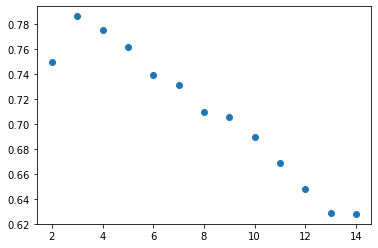

In [50]:
r = range(2,15)
plt.scatter(r,a)
plt.plot

In [51]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.7860594795398059

In [148]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, Y_train)
cv = cross_val_score(gb, X_train, Y_train, cv=10)
gb.score(X_test, Y_test)

C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

0.8610041011429155

In [149]:
print(cv)
print(cv.mean())

[0.88179342 0.85069528 0.94867598 0.87881293 0.78723826 0.86597289
 0.73743084 0.81185893 0.85141174 0.85566295]
0.8469553212106737


In [211]:
distributions  = {
    'learning_rate':[0.01,0.1,0.5,1],
    'loss':['ls','lad','huber'],
'criterion': ['mse', 'mae','friedman_mse'],
 'max_depth': [18,10, 25, 30],
 'max_features': ['auto'],
 'min_samples_leaf': [1,2,3,4],
 'min_samples_split': [2,4],
 'n_estimators': [90, 110, 120, 150]
}

In [212]:
clf = RandomizedSearchCV(GradientBoostingRegressor(), distributions, random_state=0, n_iter=100, n_jobs=-1)
search = clf.fit(X_train, Y_train)


C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [213]:
search.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 18,
 'loss': 'lad',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [214]:
search.best_score_

0.8308778656813782

In [150]:
gb = GradientBoostingRegressor(n_estimators = 150, min_samples_split=2, min_samples_leaf=4,max_features='auto',max_depth=10,loss='lad', criterion='mse')
gb.fit(X_train, Y_train)
gb.score(X_test, Y_test)

C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8583798143621019

In [151]:
def adj_r2(x,y):
    r2 = gb.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [152]:
adj_r2(X_train, Y_train)

0.8887413357039579

In [153]:
adj_r2(X_test, Y_test)

0.8553481895930949

In [154]:
import pickle
with open('OneHotEncoder.sav','wb') as f:
    pickle.dump(encoder,f)
    
with open('RandomForestRegressor.sav','wb') as f:
    pickle.dump(rf,f)